In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
sns.set()

- データセットの準備

In [ ]:
X,y=mglearn.datasets.make_forge()

In [ ]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [ ]:
df=pd.DataFrame(X,columns=['feature1','feature2'])
df['class']=y
df.head()

In [ ]:
sns.scatterplot(
    data=df,
    x='feature1',
    y='feature2',
    hue='class',
    style='class',
)

In [ ]:
X,y = mglearn.datasets.make_wave(n_samples=40)
df=pd.DataFrame(X,columns=['feature'])
df['responce']=y
sns.scatterplot(
    data=df,
    x='feature',
    y='responce'
    )

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

In [ ]:
class_df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
class_df['target']=cancer['target']
class_df['target_name']=class_df['target'].apply(lambda x:cancer['target_names'][x])
class_df.head()

In [ ]:
class_df['target_name'].value_counts()

In [ ]:
X,y = mglearn.datasets.load_extended_boston()

In [ ]:
reg_df = pd.DataFrame(X)

In [ ]:
reg_df

- k最近傍法

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(10,3),tight_layout=True)
axes = axes.ravel()
for n,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(f'{n} neighbor(s)')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],random_state=3)
training_accuracy=[]
test_accuracy=[]
for n in range(1,21):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

sns.lineplot(
    data=pd.DataFrame({
        'training_accuracy':training_accuracy,
        'test_accuracy':test_accuracy
    }),
)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=10)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
reg=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

In [ ]:
reg.score(X_test,y_test)

In [ ]:
np.arange(1,11).reshape(-1,1)

In [ ]:
test_sampls=np.linspace(-3,3,1000).reshape(-1,1)
n=[1,3,7,9]
fig,axes=plt.subplots(2,2,figsize=(8,8),tight_layout=True)
axes=axes.ravel()
for n,ax in zip(n,axes):
    reg=KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
    preds=reg.predict(test_sampls)
    ax.plot(test_sampls,preds)
    ax.scatter(X_train,y_train,marker='^',c='b')
    ax.scatter(X_test,y_test,marker='v',c='r')
    ax.set_title(f'{n} neighbor')
    ax.set_ylabel('responce')
    ax.set_xlabel('feature')

axes[0].legend(['predict','train','test'],loc='best')


- 線型モデル

w[0]: 0.393906  b: -0.031804


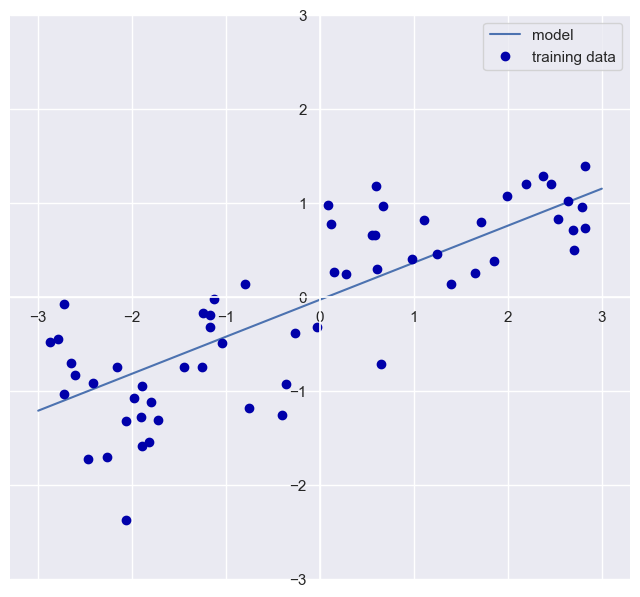

In [131]:
mglearn.plots.plot_linear_regression_wave()

In [132]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
ln=LinearRegression().fit(X_train,y_train)
print(f'coef:{ln.coef_}')
print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ln.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ln.score(X_test,y_test),2)}')

coef:[0.44153666]
intercept:-0.01711124414733381
train_score:0.66
test_score:0.69


In [134]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
ln=LinearRegression().fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ln.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ln.score(X_test,y_test),2)}')

train_score:0.95
test_score:0.61


- リッジ回帰  
各変数の重みを最小化する、という目線で制約をかける＝L2正則化

In [137]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge.score(X_test,y_test),2)}')

train_score:0.89
test_score:0.75


In [138]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge10.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge10.score(X_test,y_test),2)}')

train_score:0.79
test_score:0.64


In [139]:
ridge01=Ridge(alpha=.1).fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge01.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge01.score(X_test,y_test),2)}')

train_score:0.93
test_score:0.77


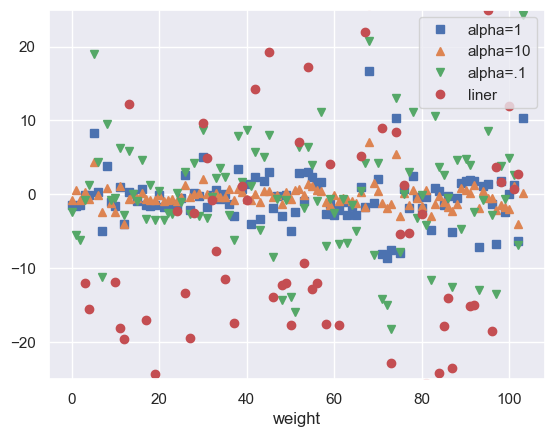

In [147]:
plt.plot(ridge.coef_,'s',label='alpha=1')
plt.plot(ridge10.coef_,'^',label='alpha=10')
plt.plot(ridge01.coef_,'v',label='alpha=.1')
plt.plot(ln.coef_,'o',label='liner')
plt.xlabel('coeficient_no')
plt.xlabel('weight')
plt.ylim(-25,25)
plt.legend()

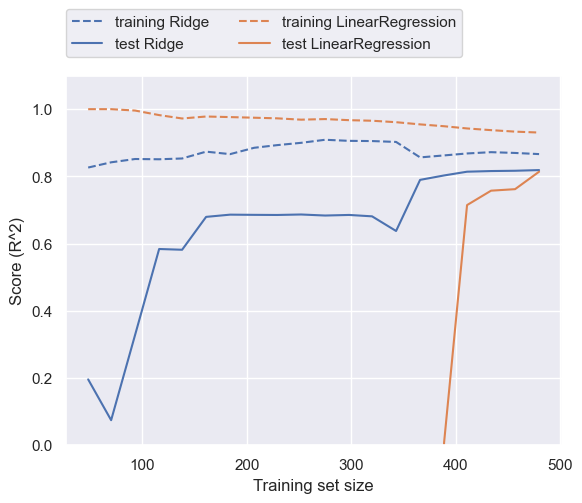

In [148]:
mglearn.plots.plot_ridge_n_samples()

In [149]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print(f'train_score:{np.round(lasso.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso.coef_!=0)}')

train_score:0.29
test_score:0.21
used:4


In [156]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(f'train_score:{np.round(lasso001.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso001.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso001.coef_!=0)}')

train_score:0.9
test_score:0.77
used:33


In [155]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(f'train_score:{np.round(lasso00001.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso00001.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso00001.coef_!=0)}')

train_score:0.95
test_score:0.64
used:96


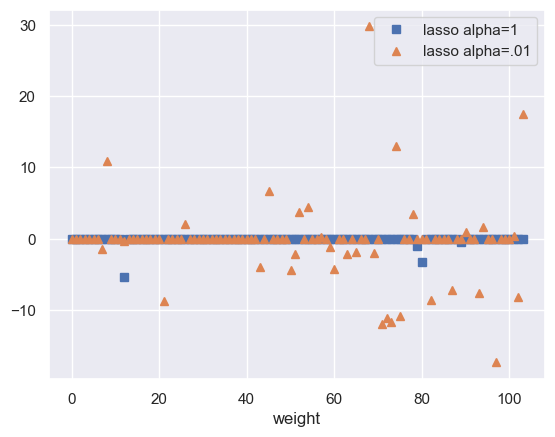

In [159]:
# plt.plot(ridge.coef_,'o',label='ridge alpha=1')
plt.plot(lasso.coef_,'s',label='lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='lasso alpha=.01')
# plt.plot(lasso00001.coef_,'v',label='lasso alpha=.00001')

plt.xlabel('coeficient_no')
plt.xlabel('weight')
# plt.ylim(-25,25)
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
